<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="6.9" color="8C3061"><b>Curso de Optimización</b></font> <br>
<font size="4.5" color="8C3061"><b>Tarea 9 - Logistic Regression and Gauss-Newton Method</b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
MSc en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>


# <font color="8C3061" >**Cargar Librerías**</font> 

In [1]:
# load libraries
import numpy as np
import pandas as pd
from typing import Tuple, Callable 
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression

# load module Opti_functions
from opti_functions import Opti_functions as opti

# load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# <font color="8C3061" >**Ejercicio 1 (5.0 puntos)**</font>

Construir un clasificador binario basado en el método de regresión logística. Resuelva:

1. Muestre que el gradiente de $L(\mathbf{w})$ está dado por

$$ \nabla_w L(\mathbf{w}) = - \sum_{i=1}^m (1 - \sigma(\mathbf{x}_i, y_i, \mathbf{w})) y_i\mathbf{x}_i
+ \lambda \mathbf{w}. $$

2. Programar las funciones 

$$\sigma(\mathbf{X}, \mathbf{y}, \mathbf{w}), \quad 
L(\mathbf{w})\quad \text{y} \quad \nabla_w L(\mathbf{w}).$$
   
- Conviene programar la función sigmoide para que pueda recibir la matriz $\mathbf{X}$ y el vector
  $\mathbf{y}$, en lugar de dar un vector $\mathbf{x}_i$ y su etiqueta $y_i$, para que
  evalue todos los datos y devuelva un vector con probabilidades
  
$$ \left( \begin{array}{c}
\sigma(\mathbf{x}_1, y_1, \mathbf{w})  \\
\sigma(\mathbf{x}_2, y_2, \mathbf{w}) \\
\vdots \\
\sigma(\mathbf{x}_m, y_m, \mathbf{w})
\end{array} \right).
$$ 

- Una vez que se tiene ese vector de probabilidades, se puede calcular el gradiente
  de $ L()$.


3. Aplique el método de descenso máximo para minimizar la función $L(\mathbf{w})$. 
   Use backtracking para calcular el tamaño de paso $\alpha_k$, de modo 
   $\mathbf{w}_{k+1} = \mathbf{w}_{k} + \alpha_k  \mathbf{p}_{k}$, donde
   
$$\mathbf{p}_{k} = - \mathbf{g}_{k} = -\nabla_w L(\mathbf{w}_k)$$

4. Pruebe el algoritmo de optimización usando $\mathbf{w}_0=(1,1,...,1)$,  el 
   número de iteraciones máximas $N=500$, la tolerancia para terminar el algoritmo 
   $\tau = \sqrt{ntrain}\epsilon_m^{1/3}$ y para el algoritmo de backtracking
   $\rho = 0.5, c_1 = 0.001$ $N_b=500$.
   
   Cree un clasificador usando $\lambda=0.001$ y otro clasificador usando $\lambda=1.0$. 
   
   En cada caso use la función $predict(X_{test}, w_*)$
   para obtener el vector de predicciones de la clase para el conjunto de prueba y
   use el código de la celda anterior para obtener la matriz de confusión y la 
   exactitud del clasificador, para ver cual de los dos tiene mejor desempeño.

  

**Solución:** 

Parte 1:

El error de clasidicación viene dado por:

$$ L(\mathbf{w}) = \sum_{i=1}^m \log(1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)) 
+ \frac{\lambda}{2} \mathbf{w}^\top\mathbf{w}.  $$ 



Luego,

$$\begin{align*}
\nabla_w L(\mathbf{w}) &= \sum_{i=1}^m \frac{-y_i\mathbf{x}_i\exp(-y_i\mathbf{w}^\top\mathbf{x}_i)}{1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)}+\lambda\mathbf{w}\\
&= -\sum_{i=1}^m \frac{\exp(-y_i\mathbf{w}^\top\mathbf{x}_i)}{1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)}y_i\mathbf{x}_i+\lambda\mathbf{w}\\
&= -\sum_{i=1}^m\left(1-\frac{1}{1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)}\right)y_i\mathbf{x}_i+\lambda\mathbf{w}\\
&=-\sum_{i=1}^m (1 - \sigma(\mathbf{x}_i, y_i, \mathbf{w})) y_i\mathbf{x}_i
\end{align*}$$

La expresión anterior puede escribirse como

$$\nabla_w L(\mathbf{w}) = - X^{\top}((1-\sigma(\mathbf{X}, \mathbf{y}, \mathbf{w}))*y)$$

Parte 2:

Función $\sigma(\mathbf{X}, \mathbf{y}, \mathbf{w})$:

In [2]:
sigmoid = lambda X,w,y: 1/(1+np.exp(-y*np.dot(X,w)))

Función $L(\mathbf{w})$:

In [3]:
L_cost = lambda X,w,y,l: np.log(1+np.exp(-y*np.dot(X,w))).sum()+l/2*np.dot(w,w)

Función $\nabla_w L(\mathbf{w})$:

In [4]:
grad_L_cost = lambda X,w,y,l: - X.T@((1-sigmoid(X,w,y))*y)+l*w

Parte 3. Se modifica la función predict para que sea más eficiente

In [5]:
def predict(X:np.array, w:np.array)->np.array:
    """Predict the label of each data point in X.
    :param X: Data matrix of shape (n,m)
    :rtype X: np.array
    :param w: Weights of the model
    :rtype w: np.array
    :return: Vector of predictions
    :rtype: np.array
    """
    
    vprob = sigmoid(X, w, np.ones(X.shape[0]))
    return np.where(vprob>0.5, 1, -1)

Se va a realizar el proceso descrito por el docente para analizar la siguiente base de datos base de datos ([Heart disease](https://archive.ics.uci.edu/dataset/45/heart+disease)) pero sin incluir las explicaciones dadas, para facilitar la lectura.

In [6]:
data = pd.read_csv('heart.csv')
print('Dimensiones de la tabla:', data.shape)
data.head()

Dimensiones de la tabla: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Datos que están en la clase '0' y en la clase '1'

In [7]:
data.groupby(['target']).size()

target
0    138
1    165
dtype: int64

In [8]:
# Cambiamos la etiqueta 0 por -1
data.loc[data['target']==0, 'target'] = -1
# Vector de etiquetas
y  = data["target"]

# Matriz de datos
X  = data.drop('target',axis=1)

# Se usa el 20% de los datos para crear el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Se estandariza cada columna de la matriz de datos para evitar que por tener diferentes 
# rangos de valores cada columna (variable), afecte al algoritmo de optimización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Número de muestras del conjunto de entrenamiento
ntrain  = X_train.shape[0]
# Se agrega una columna de 1's para que el bias b forme pare del vector w
X_train = np.hstack((np.ones((ntrain,1)), X_train))

# Número de muestras del conjunto de prueba
ntest   = X_test.shape[0]
# Se agrega una columna de 1's para que el bias b forme pare del vector w
X_test  = np.hstack((np.ones((ntest,1)), X_test))

# Se convierte los dataframes a una matriz de numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Se entrena el clasificador de regresión logística
lr    = LogisticRegression(fit_intercept=False)
model = lr.fit(X_train, y_train)

# Imprimimos las componentes de w
w = np.squeeze(model.coef_)
print('w = ')
print(np.round(w,4))

# Se calcula las predicciones para el conjunto de prueba 
y_predict = model.predict(X_test)

w = 
[ 0.1147 -0.0751 -0.8634  0.7965 -0.193  -0.2474 -0.1338  0.0921  0.5058
 -0.4787 -0.6458  0.1344 -0.8846 -0.4599]



Accuracy: 0.8360655737704918 



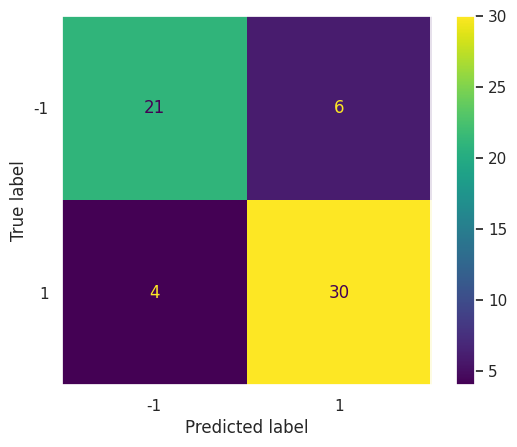

In [9]:
# Se mide el desempeño calculando la matriz de confusión y la exactitud
conf_matrix = confusion_matrix(y_test, y_predict)
acc_score = accuracy_score(y_test, y_predict)
print("\nAccuracy:", acc_score,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
disp.plot()
plt.grid(False)

plt.show()

La función $L$ se busca maximizar solo la variable $w$, ya que los datos $X_{train}$, $y_{train}$ y $\lambda$ no varian en el ejercicio. Entonces, podemos usar el algoritmo de descenso máximo presentado en la tarea 3, pero, las funciones a maximizar son:

```python
f1 = lambda w: L_cost(X_train, w, y_train, l1)
f2 = lambda w: grad_L_cost(X_train, w, y_train, l2)
```

y sus respectivos gradientes son

```python
grad_f1 = lambda w: grad_L_cost(X_train, w, y_train, l1)
grad_f2 = lambda w: grad_L_cost(X_train, w, y_train, l2)
```

La implementación se encuentra en el archivo **opti_functions.py**, que es la misma de la tarea 3.

Parte 4: El algoritmo **gradient_descent_backtracking** se encuentra en opti_functions.py

In [10]:
l1 = 0.001
l2 = 1.0
tol =np.sqrt(ntrain)*(np.finfo(float).eps)**(1/3)                 

In [11]:
def model_evaluation(X_test, y_test, w):
    y_predict = predict(X_test, w)
    conf_matrix = confusion_matrix(y_test, y_predict)
    acc_score = accuracy_score(y_test, y_predict)
    print("\nAccuracy:", acc_score,'\n')
    print('Matriz de confusión:')
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
    disp.plot()
    plt.grid(False)

Clasificador 1:

In [12]:
w1,k1,_ =opti.gradient_descent_backtracking(f = lambda w: L_cost(X_train, w, y_train, l1),
                                   grad_f = lambda w: grad_L_cost(X_train, w, y_train, l1),
                                   x0 = np.ones(14), tol = tol, iter_max=500, alpha_init=1.0, 
                                   rho=0.5, c=0.001, max_iter_bt=500)
print('Numero de Iteraciones = ', k1)
print('Costo = ', round(L_cost(X_train, w1, y_train, l1),4))
print('w1 =\n', np.round(w1,4))

Numero de Iteraciones =  30
Costo =  84.3974
w1 =
 [ 0.1114 -0.0687 -0.9334  0.8505 -0.2027 -0.2817 -0.1498  0.0965  0.5373
 -0.4927 -0.6915  0.1294 -0.9395 -0.485 ]



Accuracy: 0.8524590163934426 

Matriz de confusión:


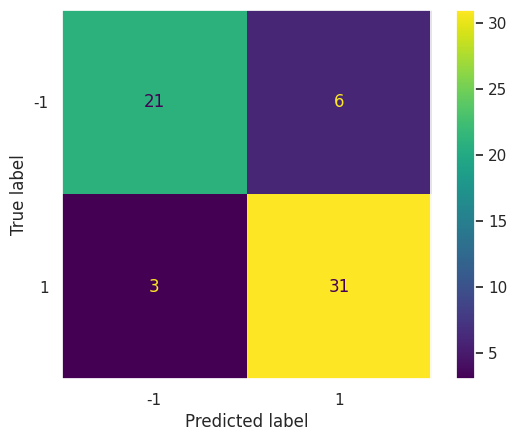

In [13]:
model_evaluation(X_test, y_test, w1)

Clasificador 2:

In [14]:
w2,k2,_ =opti.gradient_descent_backtracking(f = lambda w: L_cost(X_train, w, y_train, l2),
                                   grad_f = lambda w: grad_L_cost(X_train, w, y_train, l2),
                                   x0 = np.ones(14), tol = tol, iter_max=500, alpha_init=1.0, 
                                   rho=0.5, c=0.001, max_iter_bt=500)
print('Numero de Iteraciones = ', k2)
print('Costo = ', round(L_cost(X_train, w2, y_train, l2),4))
print('w1 =\n', np.round(w2,4))

Numero de Iteraciones =  32
Costo =  86.2254
w1 =
 [ 0.1147 -0.0751 -0.8634  0.7966 -0.193  -0.2474 -0.1338  0.0922  0.5058
 -0.4787 -0.6459  0.1343 -0.8846 -0.4599]



Accuracy: 0.8360655737704918 

Matriz de confusión:


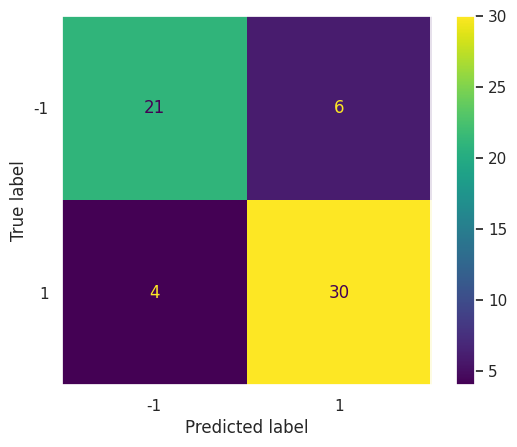

In [15]:
model_evaluation(X_test, y_test, w2)

El modelo con mejor desempeño es en el que el término de regularización es menor.

# <font color="8C3061" >**Ejercicio 2 (5.0 puntos)**</font>

Usando el método de Gauss-Newton (Algoritmo 1 de la Clase 26) ajustar el modelo 

$$ h(t; N_{max}, r, t_0) = \frac{N_{max}}{1 + \exp(-r(t - t_0))}.  $$

La variable $t$ representa el tiempo. Los parámetros del modelo son $N_{max}, r, t_0$.

Considere el conjunto de datos $\{(t_1, y_1), (t_2, y_2), ..., (t_m, y_m) \}$ que generaron en la Ayudantía 12.

Los datos están almacenados los vectores $\mathbf{T}$ y $\mathbf{Y}$:

$$
\mathbf{T} = \left( \begin{array}{c} t_1 \\ t_2 \\ \vdots \\ t_m \end{array} \right), \qquad
\mathbf{Y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_m \end{array} \right).
$$

In [16]:
fnc_h = lambda t, N_max, r, t0: N_max / (1 + np.exp(-r * (t - t0)))

m, rnd_scale  = 500, 5e2
params_hat = (N_max_hat, r_hat, t0_hat) = (1e4, 0.1, 5)

T = np.linspace(0, 100, m)
Y = fnc_h(T, *params_hat) + rnd_scale * np.random.randn(m)

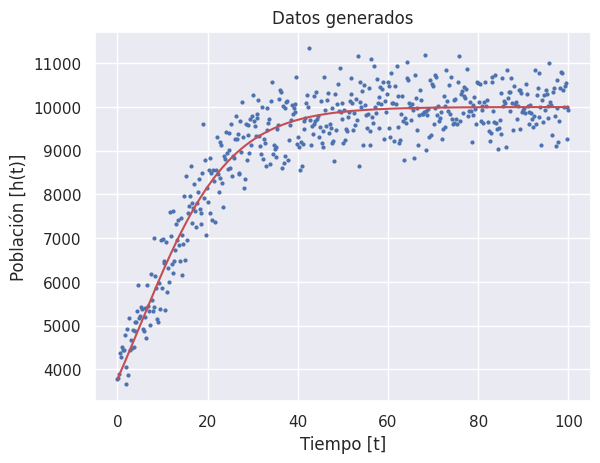

In [17]:
plt.plot(T, Y, 'o', markersize=2)
plt.plot(T, fnc_h(T, *params_hat), 'r')
plt.title('Datos generados')
plt.xlabel('Tiempo [t]')
plt.ylabel('Población [h(t)]')
plt.show()

Para resolver el problema de mínimos cuadrados no lineales hay 
que definir los residuales como la diferencia entre los que predice
el modelo $ h(t_i; N_{max}, r, t_0)$ y el valor observado $y_i$:

$$ r_i(N_{max}, r, t_0) = h(t_i; N_{max}, r, t_0) - y_i, \quad i=1,2,...,m. $$

Si definimos  $\mathbf{z} = (N_{max}, r, t_0)$ , la función de residuales está dada por

$$ \mathbf{R}(\mathbf{z}) = \left( \begin{array}{c}
          r_{1}(\mathbf{z}) \\
          r_{2}(\mathbf{z}) \\
          \vdots \\
          r_{m}(\mathbf{z}) \\
\end{array} \right). $$

Hay que calcular los parámetros $\mathbf{z} = (N_{max}, r, t_0)$ resolviendo el problema
de mínimos cuadrados no lineales.

$$ \min_{z} \; f(\mathbf{z}) = \frac{1}{2}\sum_{i=1}^m r_i^2(\mathbf{z}) 
=  \frac{1}{2} \left[ \mathbf{R}(\mathbf{z}) \right]^\top  \mathbf{R}(\mathbf{z}). $$

1. Programe el método de Gauss-Newton de acuerdo con Algoritmo 1 de la Clase 26.
   Haga que la función devuelva el último punto $\mathbf{z}_k$, 
   el vector $\mathbf{p}_k$ y el número de iteraciones $k$ realizadas.



2. Programe las funciones  $\mathbf{R}(\mathbf{z})$, $f(\mathbf{z})$ y 
   la función que calcula matriz Jacobiana $\mathbf{J}(\mathbf{z})$ de $\mathbf{R}(\mathbf{z})$
   para el modelo $h(t_i; N_{max}, r, t_0)$.


3. Aplique el método de Gauss-Newton partiendo del punto inicial
   $\mathbf{z}_0 = (1000, 0.2, 0)$, una tolerancia $\tau=\epsilon_m^{1/3}$
   
   Imprima el punto $\mathbf{z}_k$ que devuelve el algoritmo, el valor 
   $f(\mathbf{z}_k)$, el número de iteraciones $k$ realizadas y la norma de $\mathbf{p}_k$.


   
4. Grafique los datos y la curva del modelo usando los valores del punto inicial
   $\mathbf{z}_0$ y del punto $\mathbf{z}_k$ que devuelve el algoritmo, como lo hicieron en 
   la ayudantía.
   

**Solución:**

Parte 1: Implementación del algoritmo de  Gauss-Newton

In [18]:
def Gauss_Newton_method_step_size(f:Callable[[np.array],np.array],R:Callable[[np.array],np.array],
                                  J:Callable[[np.array],np.array], x0:np.array,iter_max:int,
                                  tol:float)->Tuple[np.array,np.array,int]:
    """Gauss-Newton method with step size.
    
    :param f: Function to minimize
    :rtype f: Callable[[np.array],np.array]
    :param R: Residual function
    :rtype R: Callable[[np.array],np.array]
    :param J: Jacobian of the residual function
    :rtype J: Callable[[np.array],np.array]
    :param x0: Initial point
    :rtype x0: np.array
    :param iter_max: Maximum number of iterations
    :rtype iter_max: int
    :param tol: Tolerance
    :rtype tol: float
    :return: A tuple with the solution, the descent direction and the number of iterations
    """
    
    for k in range(iter_max):
        r, Jx = R(x0),J(x0)
        fk, gk = f(x0), Jx.T@r 
       
        pk = np.linalg.solve(Jx.T@Jx, -Jx.T@r)
        if np.linalg.norm(pk)<tol:
            return x0, pk, k
        
        alpha, _ = opti.back_tracking(alpha_init=1,rho=0.5 ,c=1e-3,xk=x0,f=f,
                                      fk=fk,grad_fk=gk,dir_pk=pk,iter_maxb=500)
        
        x0 = x0 + alpha*pk
    return x0, pk, k

Parte 2: Función $R(z)$

In [19]:
def R(params:np.array)->np.array:
    return fnc_h(T, *params)-Y

Función $f(z)$

In [20]:
def f(params:np.array)->np.array:
    return 0.5*R(params)@R(params)

Función $J(z)$

In [21]:
def J(params:np.array)->np.array:
    N_max, r, t0 = params
    return np.array([fnc_h(T, N_max, r, t0)/N_max,
                     fnc_h(T,N_max,r,t0)*(T-t0)*fnc_h(T,N_max,-r,t0)/N_max,
                     -fnc_h(T,N_max,r,t0)*fnc_h(T,N_max,-r,t0)*r/N_max]).T


$$ h(t; N_{max}, r, t_0) = \frac{N_{max}}{1 + \exp(-r(t - t_0))}.  $$

Parte 3: Evaluación del método de Gauss-Newton

In [22]:
tol = np.finfo(float).eps**(1/3)
params0 = np.array([1000, 0.2, 0])

params_hat_1, pk_1, k_1 = Gauss_Newton_method_step_size(f,R,J,params0,500,tol)

In [23]:
print('(N_max,r,t0)\t\t: [', round(params_hat_1[0],6),",",round(params_hat_1[1],6),",",round(params_hat_1[2],6),"]")
print('f(zk)\t\t\t:', round(f(params_hat_1),6))
print('Número de iteraciones\t:', k_1)
print('Dirección de descenso\t:', pk_1)


(N_max,r,t0)		: [ 10027.455542 , 0.097874 , 4.638838 ]
f(zk)			: 65310278.797255
Número de iteraciones	: 9
Dirección de descenso	: [-8.23219831e-07  3.33452998e-10  3.15827426e-08]


Comparación con el valor inicial:

In [24]:
print("z0\t: [",  N_max_hat,",", r_hat,",", t0_hat,"]")
print("f(z0)\t:", f(params0))   

z0	: [ 10000.0 , 0.1 , 5 ]
f(z0)	: 16990262452.848534


Parte 4: Visualización del modelo con el valor inicial $z_0$ y el valor $z_k$ de los parámetros

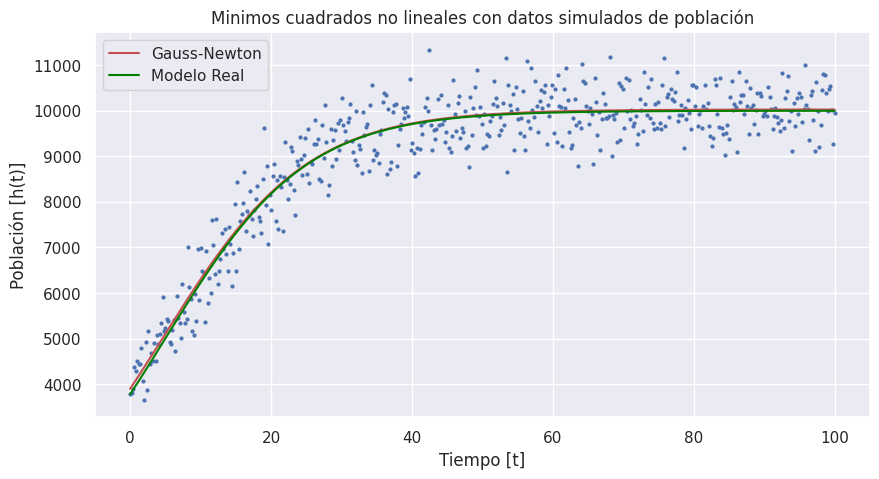

In [26]:
plt.figure(figsize=(10,5))
plt.plot(T, Y, 'o', markersize=2)
plt.plot(T, fnc_h(T, *params_hat_1), 'r', label='Gauss-Newton')
plt.plot(T, fnc_h(T, *params_hat), 'green', label='Modelo Real')
plt.title('Minimos cuadrados no lineales con datos simulados de población')
plt.xlabel('Tiempo [t]')
plt.ylabel('Población [h(t)]')
plt.legend()
plt.show()